In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
# data collection. Loading data from csv to pd dataframe
insurance_dataset = pd.read_csv("https://raw.githubusercontent.com/surajmapari/projects/main/insurance.csv")

In [3]:
# prints first 5 rows
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# total number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# info about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking missing vlaues in dataset
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# for data analysis
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


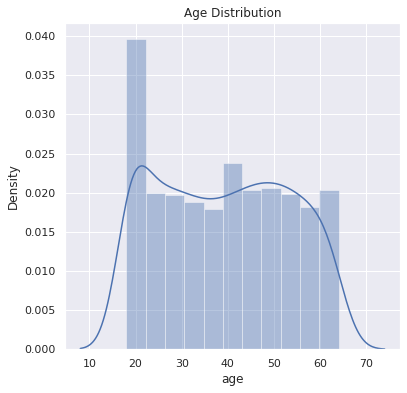

In [8]:
# lets analyse now column by column
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset["age"])
plt.title("Age Distribution")
plt.show()

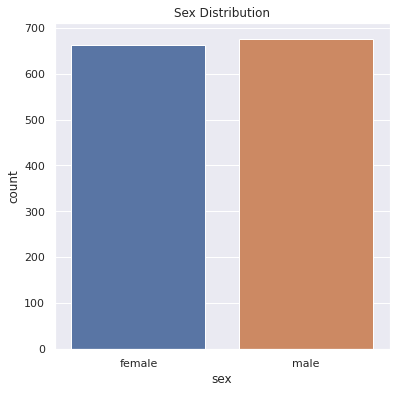

In [9]:
# Gender Distribution
plt.figure(figsize=(6,6))
sns.countplot(x = "sex", data = insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [10]:
insurance_dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


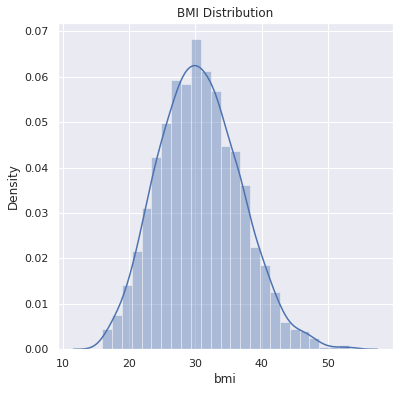

In [11]:
# distribution of bmi value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset["bmi"])
plt.title("BMI Distribution")
plt.show()

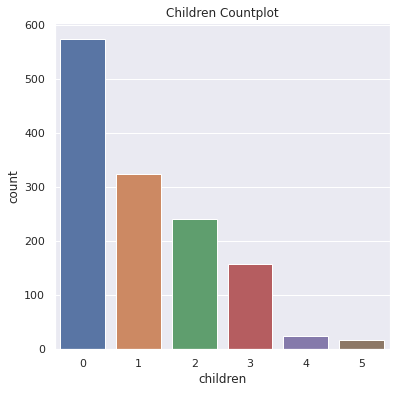

In [12]:
# Childeren distribution
plt.figure(figsize=(6,6))
sns.countplot(x="children", data = insurance_dataset)
plt.title("Children Countplot")
plt.show()

In [13]:
insurance_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

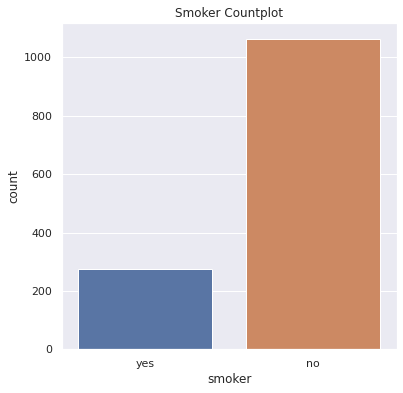

In [14]:
# Smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x="smoker", data = insurance_dataset)
plt.title("Smoker Countplot")
plt.show()

In [15]:
insurance_dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

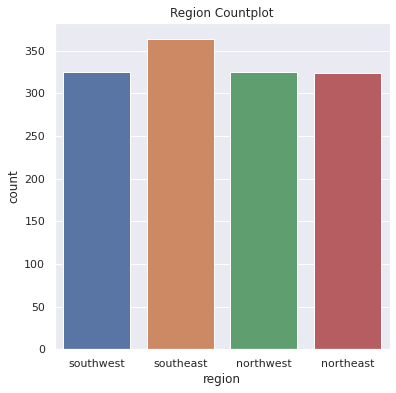

In [16]:
# Region distribution
plt.figure(figsize=(6,6))
sns.countplot(x="region", data = insurance_dataset)
plt.title("Region Countplot")
plt.show()

In [17]:
insurance_dataset["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


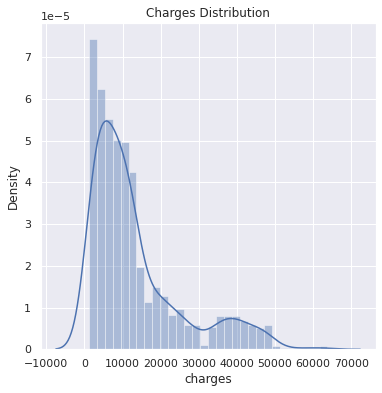

In [18]:
# distribution of bmi value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset["charges"])
plt.title("Charges Distribution")
plt.show()

In [19]:
# data Pre-processing
# encoding data of columns -> sex, smoker, region
insurance_dataset.replace({'sex': {'male':1, 'female':0}}, inplace = True)
insurance_dataset.replace({'smoker': {'yes':1, 'no':0}}, inplace = True)
insurance_dataset.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [20]:
# splitting features and target
x = insurance_dataset.drop(columns = "charges", axis = 1)
y = insurance_dataset["charges"]

In [21]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
# splitting data into training data and testing data
# 0.2 means 20% of data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [25]:
# Model training
# Linear Regression Model
regressor = LinearRegression()

In [26]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Model Evalution : Prediction on training data
# R squared value(lies between 0 to 1)

training_data_prediction = regressor.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
rmse_train = (np.sqrt(mean_squared_error(y_train, training_data_prediction)))
print("R squared value: ", r2_train)
print("RMSE value: ", rmse_train)

R squared value:  0.751505643411174
RMSE value:  6014.563860089281


In [28]:
# Model Evalution : Prediction on testing data
# R squared value(lies between 0 to 1)

testing_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test, testing_data_prediction)
rmse_test = (np.sqrt(mean_squared_error(y_test, testing_data_prediction)))
print("R squared value: ", r2_test)
print("RMSE value: ", rmse_test)

R squared value:  0.7447273869684077
RMSE value:  6191.690842285234


In [29]:
# Building Predicting System :)
# Entering sample data without column charges ;) to see our model works or not
input_data = (31,1,25.74,0,1,0)

# tuple to nparray
input_data_as_nparray = np.asarray(input_data)

# reshaping the array from 1 input only thats why we shaped it to 1 data point
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)
print("The insurance cost is USD", prediction[0])

[27662.06512745]
The insurance cost is USD 27662.06512744814
